# Perceptron Example

This notebook demonstrates the Perceptron implementation for binary classification problems.

## Background

The Perceptron is one of the earliest neural network models, developed by Frank Rosenblatt in 1957. It's a linear binary classifier that forms the foundation for more complex neural networks.

Key concepts:
- Linear decision boundary (hyperplane)
- Simple update rule: weights += learning_rate * error * input
- Guaranteed convergence for linearly separable data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import custom modules
from perceptron import Perceptron
from data_handler import generate_linearly_separable_data, train_test_split, normalize_data
from utils import plot_decision_boundary, plot_learning_curve, evaluate_model

## 1. Generate a Dataset

We start by generating a synthetic linearly separable dataset.

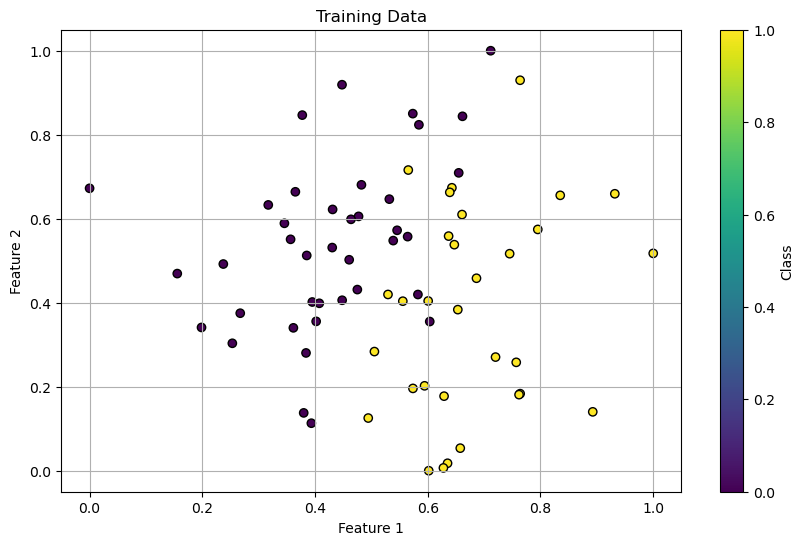

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate dataset
X, y = generate_linearly_separable_data(n_samples=100, noise=0.1, random_state=42)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize features
X_train_norm, X_test_norm = normalize_data(X_train, X_test)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X_train_norm[:, 0], X_train_norm[:, 1], c=y_train, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

## 2. Train the Perceptron Model

In [4]:
# Initialize the perceptron
perceptron = Perceptron(n_inputs=2, learning_rate=0.01, max_epochs=100, random_state=42)

# Train the model
perceptron.fit(X_train_norm, y_train)

# Display final model parameters
print(f"Learned weights: {perceptron.weights}")
print(f"Learned bias: {perceptron.bias}")

Learned weights: [ 1.00554052 -0.41234723]
Learned bias: -0.4500000000000002


## 3. Visualize the Learning Process

Let's see how the misclassifications decreased during training.

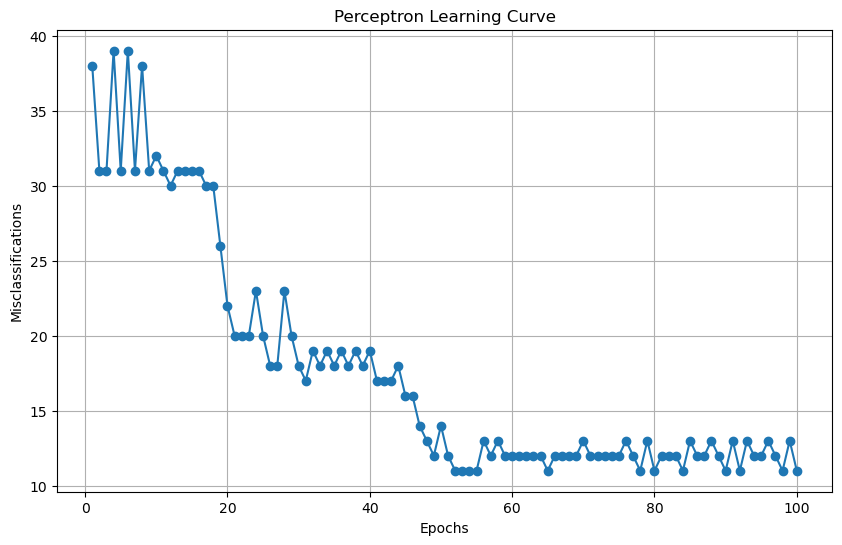

In [5]:
# Plot learning curve
plot_learning_curve(perceptron.errors)
plt.show()

## 4. Visualize the Decision Boundary

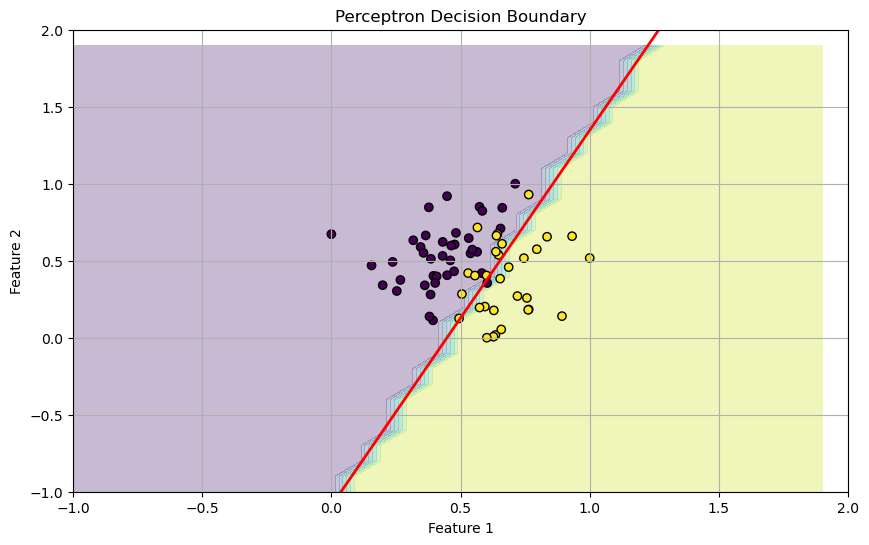

In [6]:
# Plot decision boundary
plt.figure(figsize=(10, 6))
plot_decision_boundary(X_train_norm, y_train, perceptron)
plt.grid(True)
plt.show()    

## 5. Evaluate Model Performance

In [7]:
# Make predictions on test set
y_pred = perceptron.predict(X_test_norm)

# Evaluate model
metrics = evaluate_model(y_test, y_pred)

# Print metrics
print(f"Accuracy: {metrics['accuracy']:.4f}")
print(f"Precision: {metrics['precision']:.4f}")
print(f"Recall: {metrics['recall']:.4f}")
print(f"F1 Score: {metrics['f1_score']:.4f}")

# Print confusion matrix
cm = metrics['confusion_matrix']
print("\nConfusion Matrix:")
print(f"True Positives: {cm['tp']}")
print(f"False Positives: {cm['fp']}")
print(f"True Negatives: {cm['tn']}")
print(f"False Negatives: {cm['fn']}")

Accuracy: 0.9000
Precision: 1.0000
Recall: 0.8000
F1 Score: 0.8889

Confusion Matrix:
True Positives: 12
False Positives: 0
True Negatives: 15
False Negatives: 3


## 6. Test with Different Learning Rate

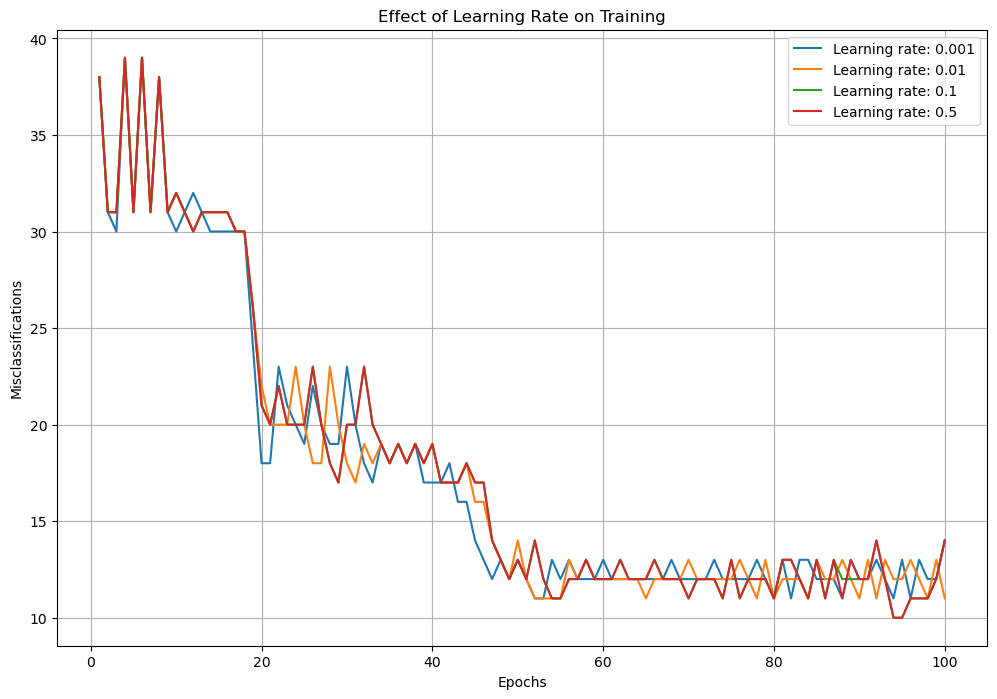

In [8]:
# Learning rates to test
learning_rates = [0.001, 0.01, 0.1, 0.5]

# Plot learning curves for different learning rates
plt.figure(figsize=(12, 8))

for lr in learning_rates:
    # Train model with this learning rate
    model = Perceptron(n_inputs=2, learning_rate=lr, max_epochs=100, random_state=42)
    model.fit(X_train_norm, y_train)
    
    # Plot learning curve
    plt.plot(range(1, len(model.errors) + 1), model.errors, label=f'Learning rate: {lr}')

plt.xlabel('Epochs')
plt.ylabel('Misclassifications')
plt.title('Effect of Learning Rate on Training')
plt.legend()
plt.grid(True)
plt.show()

## 7. Handling Non-Linearly Separable Data

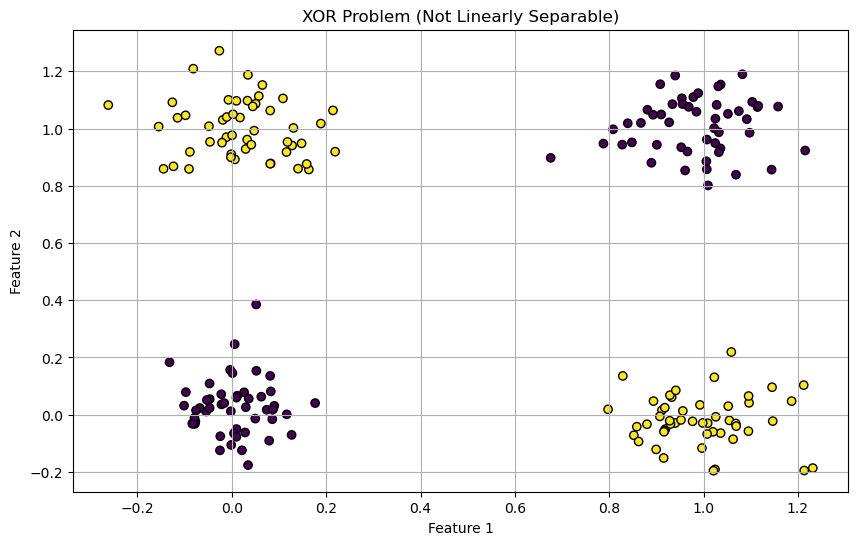

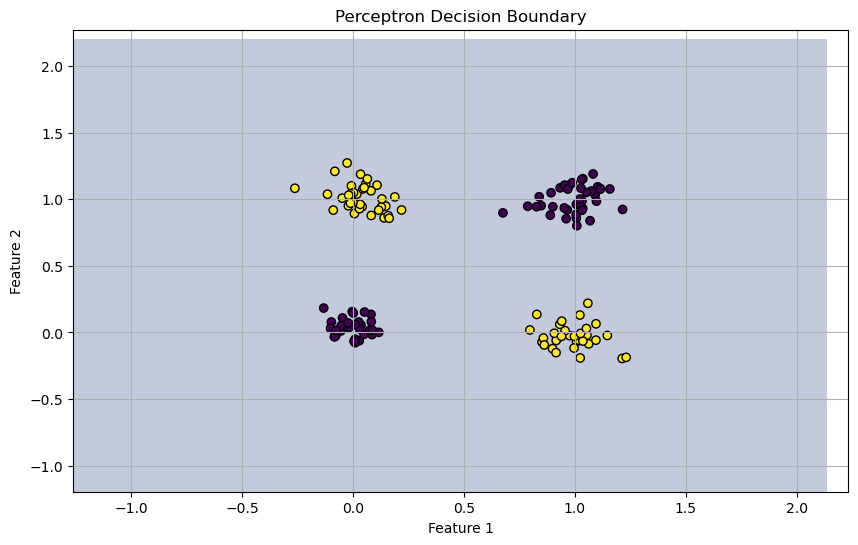

XOR Accuracy: 0.5333


In [9]:
# Generate XOR data (not linearly separable)
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Add some noise and replicate points to create a larger dataset
np.random.seed(42)
n_samples = 200
X_xor_expanded = np.zeros((n_samples, 2))
y_xor_expanded = np.zeros(n_samples)

for i in range(n_samples):
    idx = i % 4
    X_xor_expanded[i] = X_xor[idx] + np.random.normal(0, 0.1, 2)
    y_xor_expanded[i] = y_xor[idx]

# Visualize XOR data
plt.figure(figsize=(10, 6))
plt.scatter(X_xor_expanded[:, 0], X_xor_expanded[:, 1], c=y_xor_expanded, cmap='viridis', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('XOR Problem (Not Linearly Separable)')
plt.grid(True)
plt.show()

# Try training on XOR data
X_train_xor, X_test_xor, y_train_xor, y_test_xor = train_test_split(X_xor_expanded, y_xor_expanded, test_size=0.3, random_state=42)
perceptron_xor = Perceptron(n_inputs=2, learning_rate=0.01, max_epochs=100, random_state=42)
perceptron_xor.fit(X_train_xor, y_train_xor)

# Plot decision boundary (will not work well)
plt.figure(figsize=(10, 6))
plot_decision_boundary(X_train_xor, y_train_xor, perceptron_xor)
plt.grid(True)
plt.show()

# Evaluate performance (expected to be poor)
y_pred_xor = perceptron_xor.predict(X_test_xor)
metrics_xor = evaluate_model(y_test_xor, y_pred_xor)
print(f"XOR Accuracy: {metrics_xor['accuracy']:.4f}")

## 8. Conclusion

The Perceptron works well for linearly separable data but fails with non-linear problems like XOR. This limitation led to the development of multi-layer neural networks and non-linear activation functions.

Key takeaways:
- Perceptrons can only learn linear decision boundaries
- Learning rate affects convergence speed and stability
- The model is mathematically guaranteed to converge if a solution exists